<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/1stWeek/Tugas_ML_1_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn mglearn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


In [27]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset dari file CSV
df = pd.read_csv("/content/drive/MyDrive/smt akhir/ml/HeartDisease.csv")

# Menampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [17]:
# Drop semua data yang mengandung NaN
df = df.dropna()

In [20]:
# X = semua fitur kecuali 'num', y = 'num'
X = df.drop('num', axis=1)
y = df['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Prediksi
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

In [25]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

Accuracy: 0.6166666666666667
Precision: 0.3248062015503876
Recall: 0.27968253968253964
F1 Score: 0.2867306533129318
AUC: 0.7622020961916107


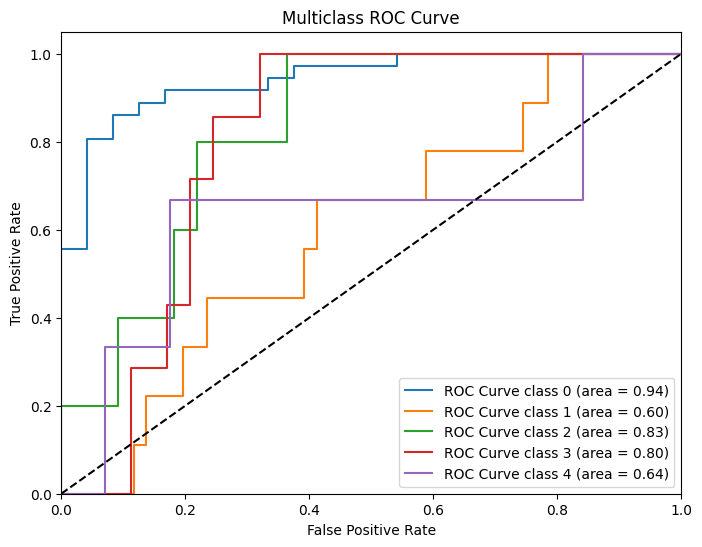

In [28]:
# Binarize y_test
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predict probabilitas
y_score = model.predict_proba(X_test)

# ROC Curve per Kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot semua ROC Curve
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC Curve class {0} (area = {1:0.2f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Persamaan Matematika

1. Persamaan logistic Regression

Pada model Multiclass Logistic Regression yang digunakan, proses prediksi dilakukan dengan menghitung probabilitas setiap sampel terhadap semua kelas yang tersedia. Setelah seluruh probabilitas dihitung, model memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi. Berbeda dengan Logistic Regression binary yang menggunakan threshold 0,5, pada multiclass model ini prediksi ditentukan berdasarkan nilai probabilitas maksimum tanpa membandingkan terhadap threshold tertentu.

2. Accuracy

Akurasi mengukur berapa banyak prediksi yang benar dibandingan dengan total data:

Akurasi= TP+TN / TP+TN+FP+FN

3. Precision

Presisi mengukur seberapa banyak prediksi positif yang benar:

Presisi= TP / TP+FP

4. Recall (Sensitivitas)

Recall mengukur seberapa banyak kasus positif yang berhasil dideteksi:

Recall= TP / TP+FN

5. ROC & AUC

ROC Curve menunjukkan hubungan antara False Positive Rate (FPR) dan True Positive Rate (TPR):

TPR= TP / TP+FN , FPR= FP / FP+TN

AUC adalah luas area di bawah kurva ROC

AUC = 1 berarti model sempurna
AUC = 0.5 berarti model tidak lebih baik dari tebak-tebakan acak.